In [1]:
from kid_readout.roach.baseband import RoachBaseband
from kid_readout.roach.tests.mock_roach import MockRoach
from kid_readout.roach.tests.mock_valon import MockValon
from kid_readout.measurement.acquire import acquire

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def baseband_sweep():
    num_tones = 16
    num_waveforms = 2**5
    num_tone_samples = 2**10
    ri = RoachBaseband(roach=MockRoach('roach', sleep_for_fake_data=True), initialize=False, adc_valon=MockValon())
    center_frequencies = np.linspace(100, 200, num_tones)
    offsets = np.linspace(-20e-3, 20e-3, num_waveforms)
    tone_banks = [center_frequencies + offset for offset in offsets]
    get_state = lambda: {'something': 'something state'}
    # preload = False
    sweep = acquire.sweep(ri=ri, tone_banks=tone_banks, num_tone_samples=num_tone_samples, length_seconds=0.1,
                          get_state=get_state, description="description")
    return sweep

In [3]:
s = baseband_sweep()

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0
bank_offset= 0 start_offset= 0 start_offset_bytes= 

In [4]:
s0 = s.sweep(0)

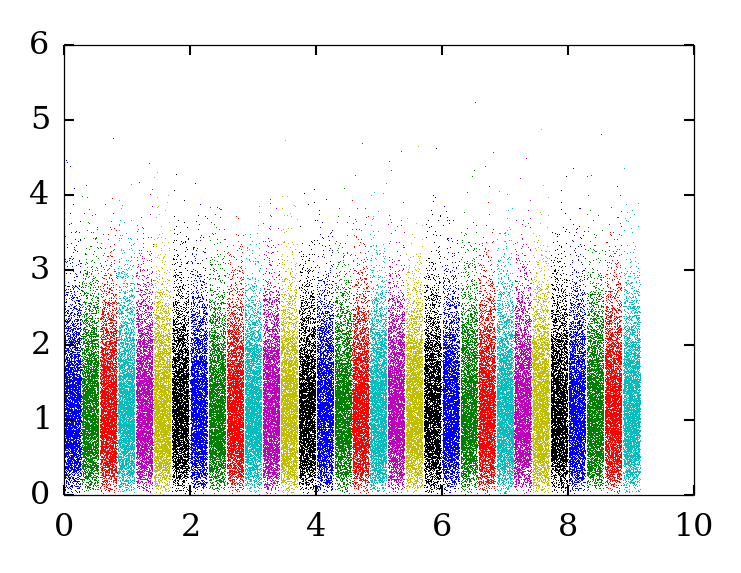

In [7]:
fig, ax = plt.subplots()
t0 = s0.streams[0].epoch
for stream in s0.streams:
    ax.plot(stream.epoch - t0 + stream.sample_time, np.abs(stream.s21_raw), ',')